<a href="https://colab.research.google.com/github/byein/Crack_Detection/blob/main/crack_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setting

In [9]:
# importing necessary libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [20]:
from google.colab import files
uploaded = files.upload()

Saving test6.PNG to test6.PNG
Saving test5.PNG to test5.PNG
Saving test4.PNG to test4.PNG
Saving test3.PNG to test3.PNG


In [28]:
# read a cracked sample image
img1 = cv2.imread('test1.jpg')
img3 = cv2.imread('test3.PNG')
img4 = cv2.imread('test4.PNG')
img5 = cv2.imread('test5.PNG')
img6 = cv2.imread('test6.PNG')

#Image Processing

In [35]:
# Convert into gray scale
gray = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)

# Image processing ( smoothing )
# Averaging
blur = cv2.blur(gray,(3,3))

# Apply logarithmic transform
img_log = (np.log(blur+1)/(np.log(1+np.max(blur))))*255

# Specify the data type
img_log = np.array(img_log,dtype=np.uint8)

# Image smoothing: bilateral filter
bilateral = cv2.bilateralFilter(img_log, 5, 75, 75)

# Canny Edge Detection
edges = cv2.Canny(bilateral,100,200)

# Morphological Closing Operator
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Create feature detecting method
# sift = cv2.xfeatures2d.SIFT_create()
# surf = cv2.xfeatures2d.SURF_create()
# orb = cv2.ORB_create(nfeatures=1500)

# Make featured Image
# keypoints, descriptors = orb.detectAndCompute(closing, None)
# featuredImg = cv2.drawKeypoints(closing, keypoints, None)

#Result

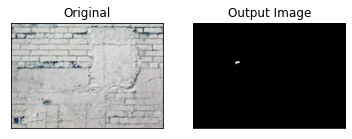

In [45]:
# Create an output image
cv2.imwrite('output.jpg', closing)

# Use plot to show original and output image
plt.subplot(121),plt.imshow(img5)
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing,cmap='gray')
plt.title('Output Image'),plt.xticks([]), plt.yticks([])
plt.show()

#Crack Detection

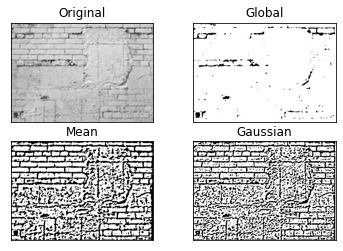

In [54]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 

img = cv2.imread('test6.PNG',0)
# img = cv2.medianBlur(img,5)

ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)



th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,15,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,15,2)

titles = ['Original','Global','Mean','Gaussian']

images = [img,th1,th2,th3]

for i in range(4):
	plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
	plt.title(titles[i])
	plt.xticks([]),plt.yticks([])

plt.show()